# Motivations

You're interested in how your product changes in popularity across time in a single location. Location-based analysis is the most adequate for this analytics question.

### Possible Answers


    True
    
    
    False{Answer}

**Correct! Location-based analysis would not be appropriate for this. We need some variation by geography.**

# Comparisons

You collect some Twitter data regarding your product and find that people are tweeting more about it in State A versus State B. What is the most plausible inference you could draw from these data?

### Possible Answers


    People in State A enjoy the product more than people in State B.
    
    
    People with their locations enabled in State A are mentioning the product more than those in State B. {Answer}
    
    
    People in State A are speaking about the product more than in State B.
    
    
    People with their locations enabled in State A enjoy the product more than those in State B.

**Correct! We are observing people with their locations enabled and they are talking about the product more in State A compared to State B.**

# Coordinates and bounding boxes

True or False: The bounding box is a single set of points which depict latitude and longitude.

### Possible Answers


    True
    
    
    False{Answer}

In [1]:
import pandas as pd
tweets_sotu = pd.read_csv('datasets/tweets_sotu.csv')
tweets_sotu.loc[:,"place"] = tweets_sotu.place.apply(eval)
tweets_sotu.head(1)

,index,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,timestamp_ms,user-screen_name,user-location,quoted_status-user-screen_name,quoted_status-text,quoted_status-extended_tweet-full_text,extended_tweet,extended_tweet-full_text,extended_entities
0,0,Wed Jan 31 02:07:51 +0000 2018,958522184518873088,958522184518873088,Dumb ass mother fucker https://t.co/UpMmRjKHYR,"[0, 22]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,...,en,1517364471927,_justinbordelon,We out here,PolitiFact,"In Davos, @realDonaldTrump downplayed climate ...","In Davos, @realDonaldTrump downplayed climate ...",NaN,NaN,NaN


In [2]:
def flatten_tweets(tweets_json):
    tweets = []

    # get rid of empty lines
    tweets_json = list(filter(len, tweets_json))
    
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Store the user location
        tweet_obj['user-location'] = tweet_obj['user']['location']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
    
            if 'extended_tweet' in tweet_obj['retweeted_status']:
                # Store the extended retweet text in 'retweeted_status-extended_tweet-full_text'
                tweet_obj['retweeted_status-extended_tweet-full_text'] = tweet_obj['retweeted_status']['extended_tweet']['full_text']
                
        if 'quoted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['quoted_status-user-screen_name'] = tweet_obj['quoted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['quoted_status-text'] = tweet_obj['quoted_status']['text']
    
            if 'extended_tweet' in tweet_obj['quoted_status']:
                # Store the extended retweet text in 'retweeted_status-extended_tweet-full_text'
                tweet_obj['quoted_status-extended_tweet-full_text'] = tweet_obj['quoted_status']['extended_tweet']['full_text']
        tweets.append(tweet_obj)
    return tweets

In [3]:
# exercise 01

"""
Accessing user-defined location

In the slides, we saw that we could obtain user location via user-generated text, including the tweet itself and the location field in the user's description. These are the two most imprecise methods of obtaining user location, but also possibly more readily available.

In this exercise, you're going extract the user-defined location from a single example tweet as well as a large set of tweets. We've added another line to our flatten_tweets() function which will allow you to access user-defined location within the data frame.

tweet_obj['user-location'] = tweet_obj['user']['location']

In addition, the single tweet in JSON format tweet_json and the State of the Union tweets in JSON format tweets_sotu_json have been loaded for you.
"""

# Instructions

"""

    Print out the user-defined location of a single tweet in the Twitter JSON.

    Flatten the Twitter JSON of the State of the Union tweets.

    Print out the first 10 user-defined locations in tweets_sotu with the value_counts() and head() functions.

"""

# solution

# Print out the location of a single tweet
#print(tweet_json['user']['location'])

# Flatten and load the SOTU tweets into a dataframe
#tweets_sotu = pd.DataFrame(flatten_tweets(tweets_sotu_json))

# Print out top five user-defined locations
print(tweets_sotu['user-location'].value_counts().head())

#----------------------------------#

# Conclusion

"""

"""

user-location
Washington, DC       20
Los Angeles, CA      13
New York, NY         11
Brooklyn, NY          8
San Francisco, CA     7
Name: count, dtype: int64


'\n\n'

In [4]:
# exercise 02

"""
Accessing bounding box

Most tweets which have coordinate-level geographical information attached to them typically come in the form of a bounding box. Bounding boxes are a set of four longitudinal/latitudinal coordinates which denote a particular area in which the user can be located. The bounding box is located in the place value of the Twitter JSON.

The dataset has been loaded for you as a DataFrame in tweets_sotu.
"""

# Instructions

"""

    Complete the getBoundingBox() function by accessing the coordinates value within the bounding box dictionary.

    Apply the getBoundingBox() function to the appropriate column in the tweets_sotu DataFrame.

"""

# solution

def getBoundingBox(place):
    """ Returns the bounding box coordinates."""
    return place['bounding_box']['coordinates']

# Apply the function which gets bounding box coordinates
bounding_boxes = tweets_sotu['place'].apply(getBoundingBox)

# Print out the first bounding box coordinates
print(bounding_boxes.values[0])

#----------------------------------#

# Conclusion

"""

"""

[[[-94.043628, 28.855128], [-94.043628, 33.019544], [-88.758389, 33.019544], [-88.758389, 28.855128]]]


'\n\n'

In [5]:
# exercise 03

"""
Calculating the centroid

The bounding box can range from a city block to a whole state or even country. For simplicity's sake, one way we can deal with handling these data is by translating the bounding box into what's called a centroid, or the center of the bounding box. The calculation of the centroid is straight forward -- we calculate the midpoints of the lines created by the latitude and longitudes.

numpy has been imported as np.
"""

# Instructions

"""

    Obtain the first set of coordinates from the place JSON.

    Calculate the central longitude by adding up the longitude list and dividing by two.

    Do the same for the latitudes.

    Apply the calculateCentroid() function to the place column.

"""

# solution
import numpy as np
def calculateCentroid(place):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2
        central_lat  = np.sum(lats) / 2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)
    
# Calculate the centroids of place     
centroids = tweets_sotu['place'].apply(calculateCentroid)

#----------------------------------#

# Conclusion

"""

"""

'\n\n'

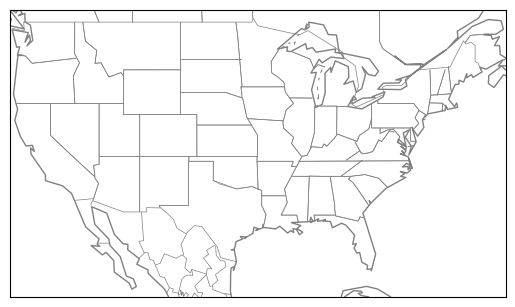

'\n\n'

In [6]:
# exercise 04

"""
Creating Basemap map

Basemap allows you to create maps in Python. The library builds projections for latitude and longitude coordinates and then passes the plotting work on to matplotlib. This means you can build extra features based on the power of matplotlib.

In this exercise, we're going to set up a map of the continental United States on a Mercator projection. The corner coordinates of this map are provided for you below.
"""

# Instructions

"""

    Import Basemap from mpl_toolkits.basemap.
   
    Instantiate Basemap. Use each element of us_boundingbox in order as arguments.
---

    Instantiate Basemap. Use each element of us_boundingbox in order as arguments.

    Draw the continents , coastlines, and countries with Basemap methods .fillcontinents(), .drawcoastlines(), and .drawcountries(), respectively.

"""

# solution

# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox[0],
            llcrnrlat = us_boundingbox[1],
            urcrnrlon = us_boundingbox[2],
            urcrnrlat = us_boundingbox[3],
            projection='merc')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
m.drawstates(color='gray')
plt.show()

#----------------------------------#

# Conclusion

"""

"""

'\n\n'

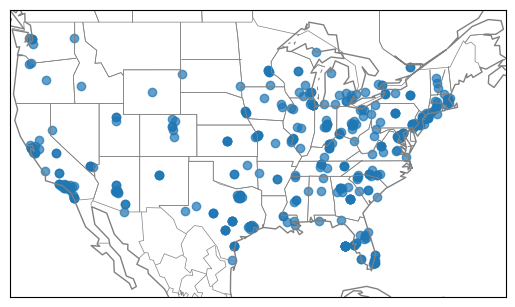

In [7]:
# exercise 05

"""
Plotting centroid coordinates

Because we can't plot whole bounding boxes, we summarize the bounding box location into a single point called a centroid. Plotting these on a Basemap map is straightforward. Once we calculate the centroids, we separate the longitudes and latitudes, then pass to the .scatter() method.

The Basemap object m has been created for you. The dataset tweets_sotu and function calculateCentroid() have also been loaded.
"""

# Instructions

"""

    Calculate the centroids and store in centroids.

    Set the argument zorder in fillcontinents such that the continents appear behind the points.

    Plot the points. Remember to set the latlon argument to the correct value.

"""

# solution

# Calculate the centroids for the dataset
# and isolate longitudue and latitudes
centroids = tweets_sotu['place'].apply(calculateCentroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.7)
#plt.show()

#----------------------------------#

# Conclusion

"""

"""

In [8]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

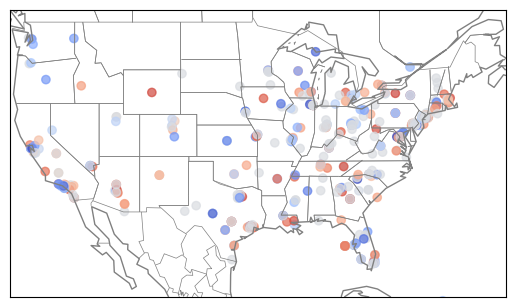

'\n\n'

In [15]:
# exercise 06

"""
Coloring by sentiment

We want to be able to differentiate by place with our Twitter analysis. One distinguishing factor between places is how the State of the Union speech was received. For this purpose, we'll use the sentiment analysis we covered in Chapter 2 to evaluate how the speech was received in different parts of the country.

The tweets_sotu dataset has been loaded for you, as well as lon, lat, and the Basemap map m. SentimentIntensityAnalyzer is instantiated as sid in your workspace.
"""

# Instructions

"""

    Calculate the sentiment scores and store them.

    Draw the points, setting the color argument to sentiment_score and the colormap to 'coolwarm'.

"""

# solution

# Generate sentiment scores
sentiment_scores = tweets_sotu['text'].apply(sid.polarity_scores)

# Isolate the compound element
sentiment_scores = [x['compound'] for x in sentiment_scores]

# Draw the points
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(lon, lat, latlon = True, 
           c = sentiment_scores,
           cmap = 'coolwarm', alpha = 0.7)
           
# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""

"""